In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df=df.drop(['CustomerId','Surname','RowNumber','Geography'],axis='columns')
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0


In [3]:
df.shape

(10000, 10)

In [4]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.dtypes

CreditScore          int64
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df[df['EstimatedSalary']<100]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Male,45,4,122917.71,1,1,1,11.58,1
5548,710,Male,38,2,0.00,2,1,0,96.27,0
9010,645,Female,59,8,121669.93,2,0,0,91.75,1
9647,625,Male,31,5,0.00,2,0,1,90.07,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [8]:
df['Exited'].replace({0:"No",1:"Yes"},inplace=True)

In [9]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Exited",palette="Set1")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

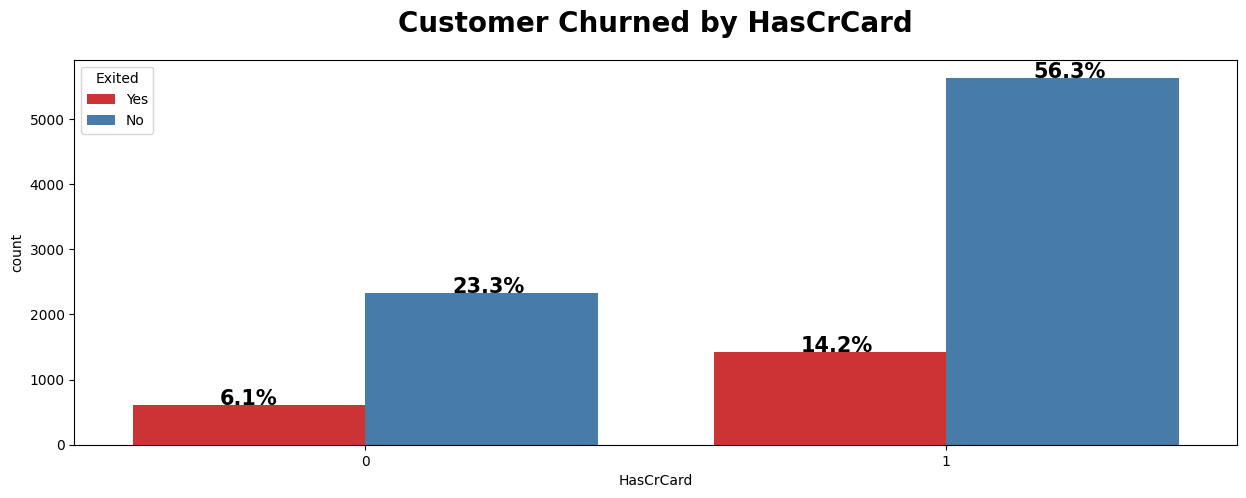

In [10]:
countplot('HasCrCard')

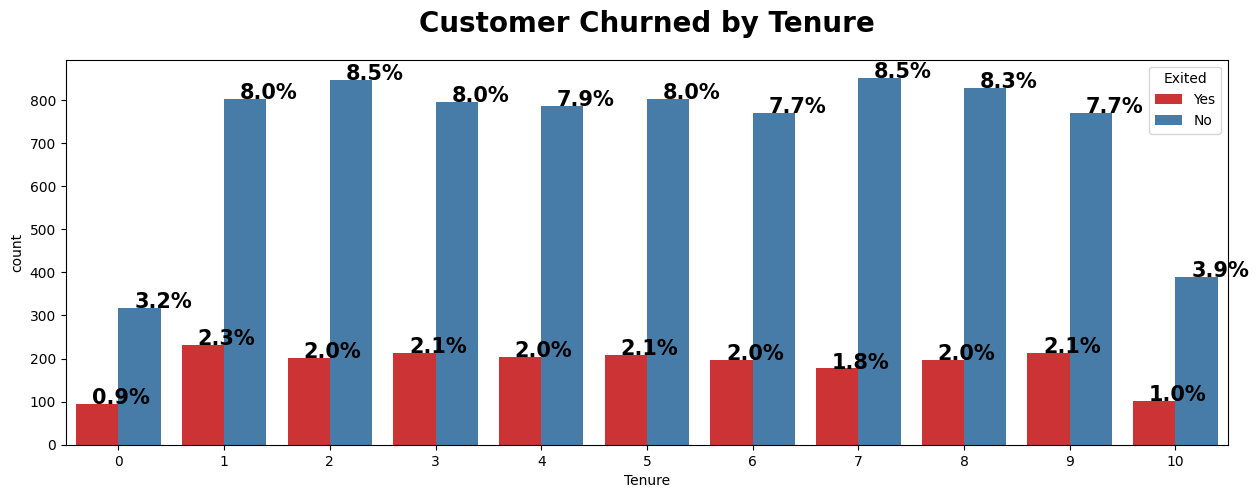

In [11]:
countplot('Tenure')

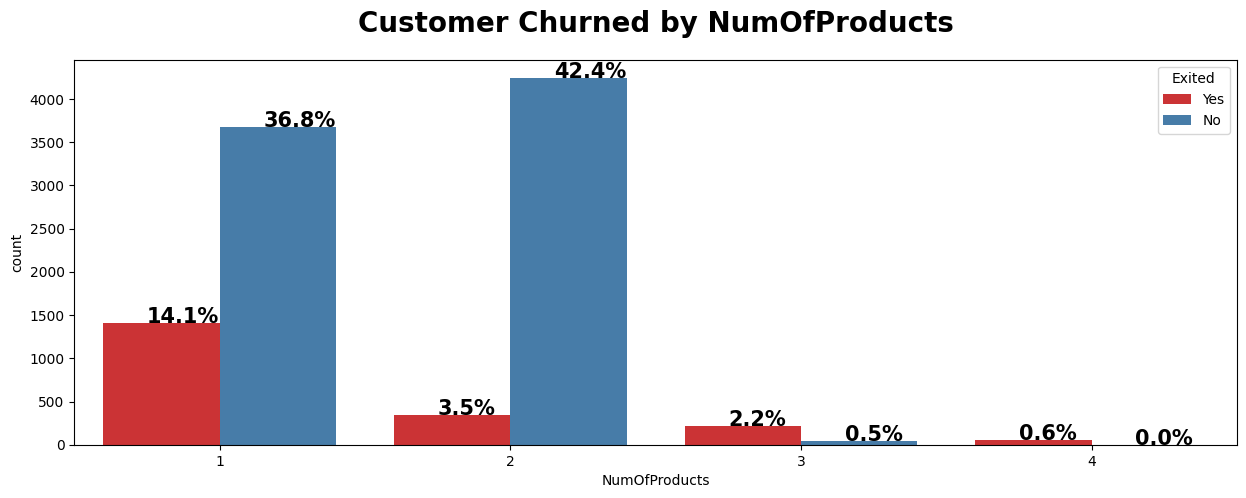

In [12]:
countplot('NumOfProducts')

In [13]:
def plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Exited",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.violinplot(data=df, x=df[column], y=df['Exited'])
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

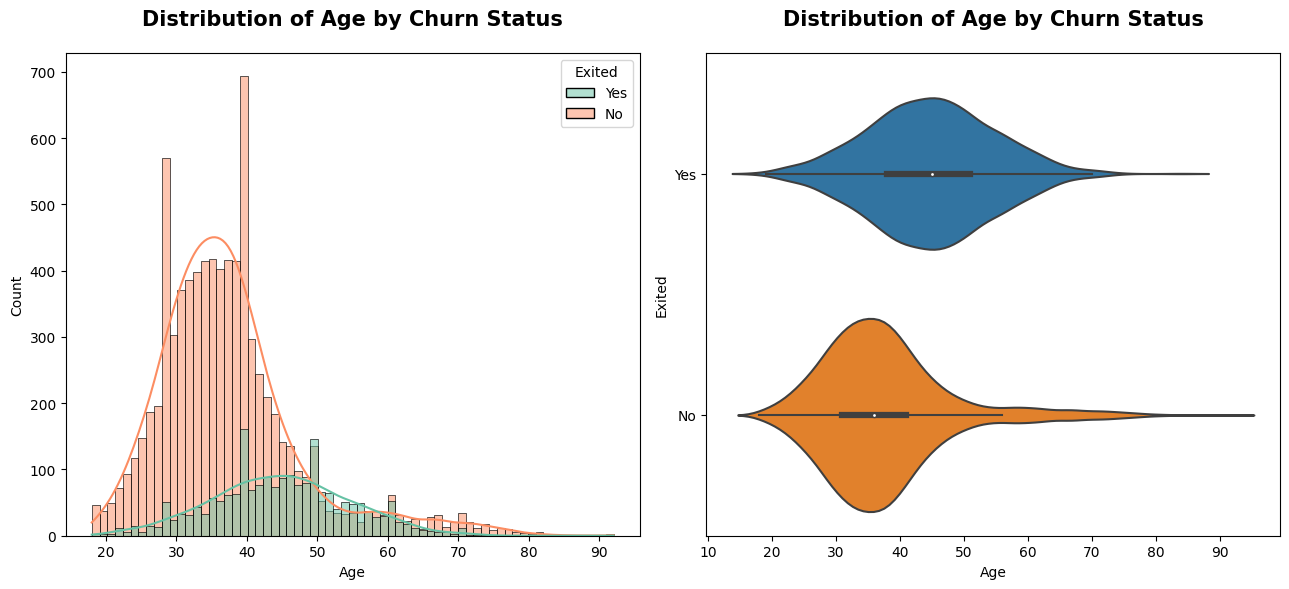

In [14]:
plot('Age')

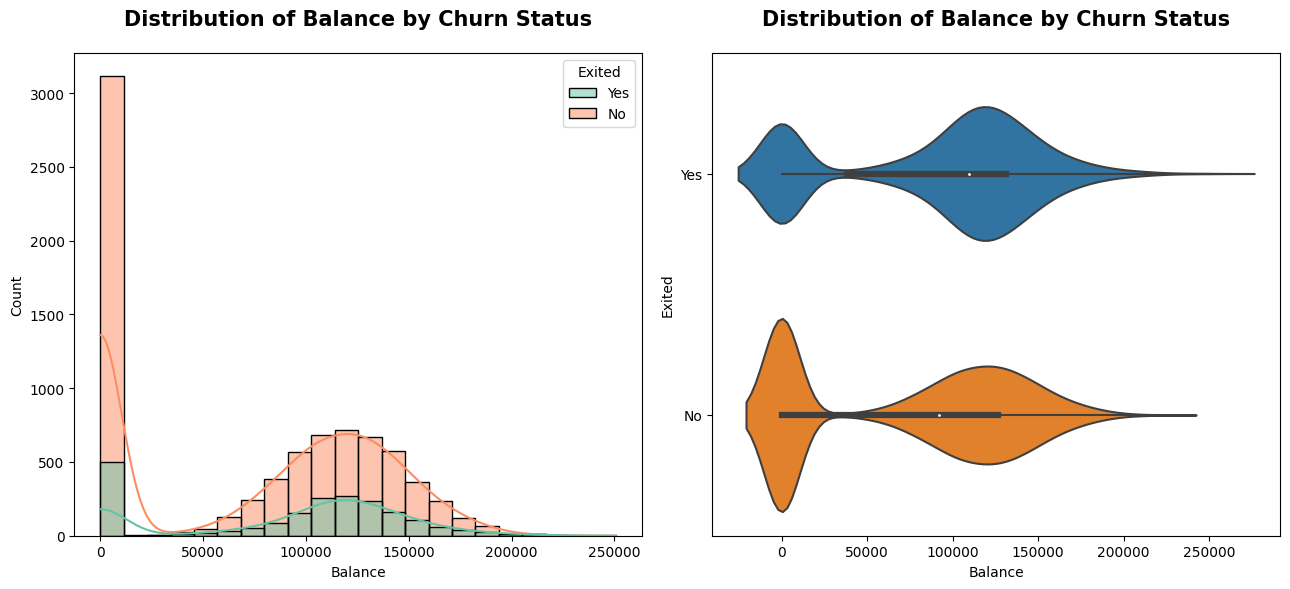

In [15]:
plot('Balance')

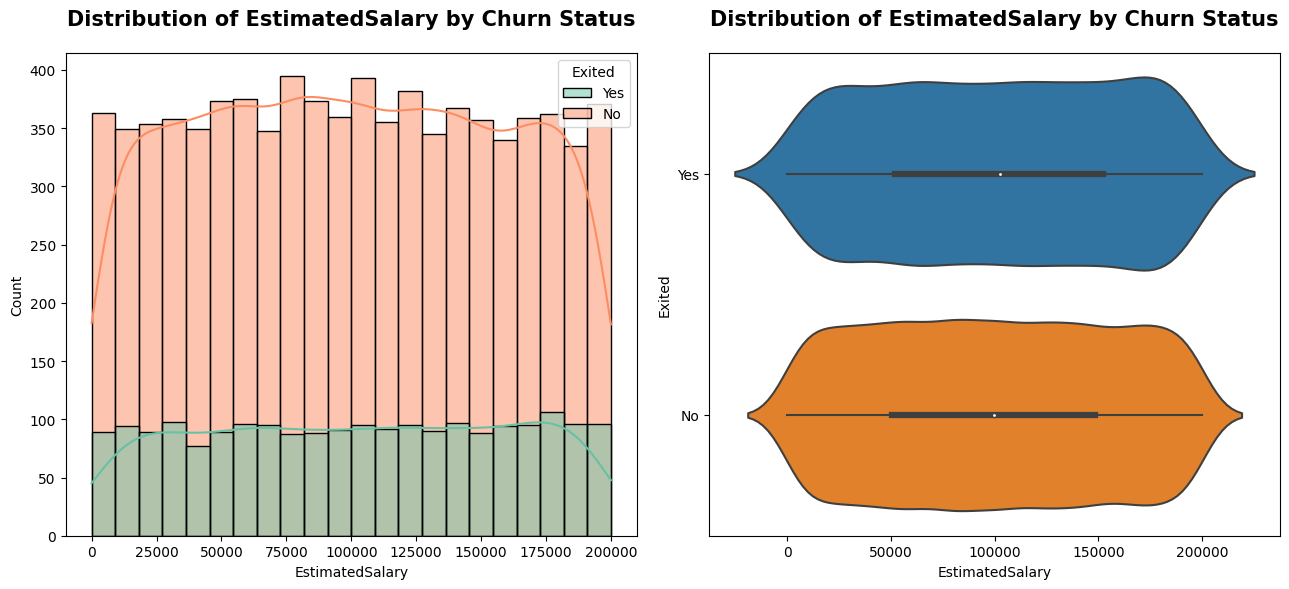

In [16]:
plot('EstimatedSalary')

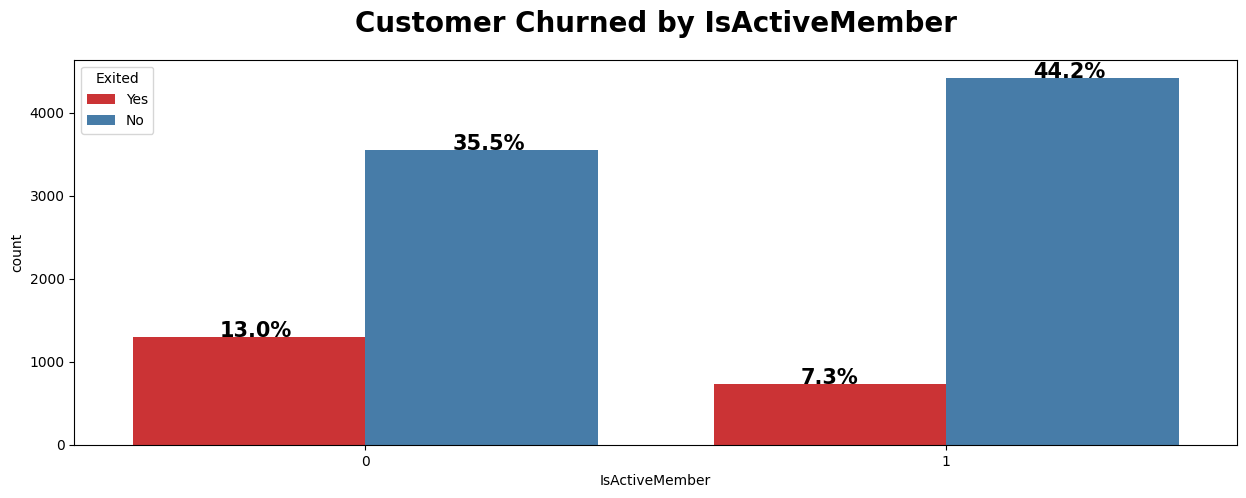

In [17]:
countplot('IsActiveMember')

In [18]:
def print_cat(df):
    for column in df:
        if(df[column].dtypes=='object'):
            print(f'{column}:{df[column].unique()}')
print_cat(df)

Gender:['Female' 'Male']
Exited:['Yes' 'No']


In [19]:
df.replace({'Male':0,'Female':1},inplace=True)

In [20]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,Yes
1,608,1,41,1,83807.86,1,0,1,112542.58,No
2,502,1,42,8,159660.80,3,1,0,113931.57,Yes
3,699,1,39,1,0.00,2,0,0,93826.63,No
4,850,1,43,2,125510.82,1,1,1,79084.10,No


In [21]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,Yes
1,608,1,41,1,83807.86,1,0,1,112542.58,No
2,502,1,42,8,159660.80,3,1,0,113931.57,Yes
3,699,1,39,1,0.00,2,0,0,93826.63,No
4,850,1,43,2,125510.82,1,1,1,79084.10,No


In [22]:
df.isnull().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
#age is right skewed so using  we use logarithm
oldage=df['Age']
df["Age"] = np.log(df["Age"])

<AxesSubplot: xlabel='Age', ylabel='Count'>

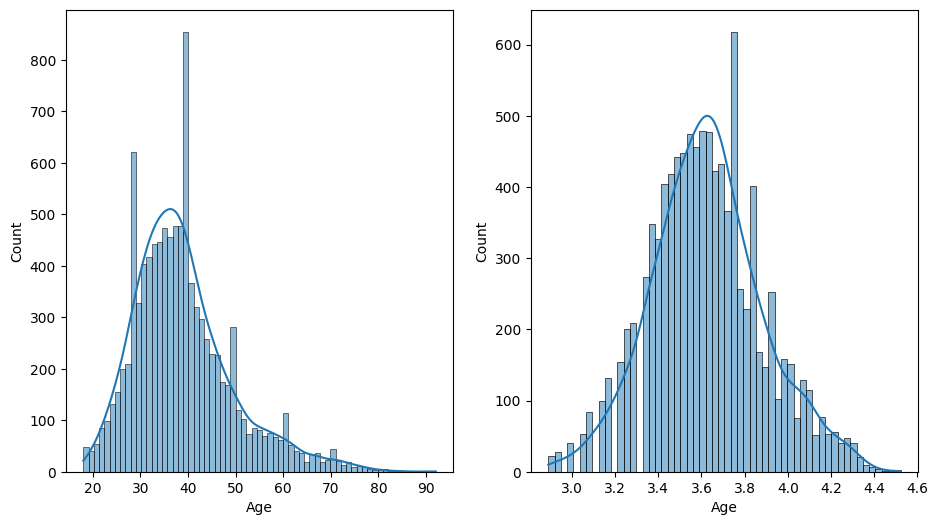

In [24]:
plt.figure(figsize=(11,6))
plt.subplot(1,2,1)
sns.histplot(oldage, kde=True)
plt.subplot(1,2,2)
sns.histplot(df['Age'],kde=True)


In [25]:
df['Exited'].replace({'No':0,'Yes':1},inplace=True)

In [26]:
x=df.drop('Exited',axis='columns')
y=df['Exited']
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
#clearly it is biased dataset so we need to balance
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()


1    7963
0    7963
Name: Exited, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2)

In [29]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)


AdaBoostClassifier()

In [30]:
x_train.shape

(12740, 9)

In [33]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(30,input_shape=(12,0),activation='relu'),
    keras.layers.Dense(25,activation='relu'),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
    
])
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=25)

Epoch 1/25


ValueError: in user code:

    File "C:\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1080, in train_step
        y_pred = self(x, training=True)
    File "C:\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Python\Python310\lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 12, 0), found shape=(None, 9)


In [31]:
y_pred=ada.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8035153797865662

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1)
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1)

In [34]:
y_pred1=clf.predict(x_test)
accuracy_score(y_test,y_pred1)

0.810420590081607

In [35]:
from sklearn.linear_model import LogisticRegression
clf1= LogisticRegression(random_state=0)
clf1.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [36]:
y_pred2=clf1.predict(x_test)
accuracy_score(y_test,y_pred2)

0.5621468926553672

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred1))
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1577
           1       0.80      0.81      0.81      1609

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1577
           1       0.81      0.81      0.81      1609

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      1577
           1       0.56      0.66      0.60      1609

    accuracy                           0.56      3186
   macro avg       0.56      0.56      0.56      3186
weighted avg       0.56      0.56      0.56      3186



In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
ada_auc = roc_auc_score(y_test,y_pred)
grb_auc = roc_auc_score(y_test,y_pred1)
lr_auc = roc_auc_score(y_test,y_pred2)

In [39]:
print('adaboost=%.3f'%(ada_auc))
print('gradientboost=%.3f'%(grb_auc))
print('logistic regression=%.3f'%(lr_auc))

adaboost=0.803
gradientboost=0.810
logistic regression=0.561


In [40]:
import pickle 
with open('ada.pkl', 'wb') as f:
    pickle.dump(ada,f)

In [41]:
ada.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [42]:
clf.predict(619,1,34,2,83456,1,1,1,20000)

TypeError: GradientBoostingClassifier.predict() takes 2 positional arguments but 10 were given

In [43]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
853,653,1,3.761200,6,0.000000,2,1,1,7330.590000
7494,795,1,3.583519,1,151844.640000,1,1,1,135388.890000
3438,445,1,3.401197,3,0.000000,2,1,1,127939.190000
1068,594,0,4.043051,6,0.000000,1,1,0,19376.560000
11550,736,0,3.966151,5,0.000000,1,0,0,25858.076317
...,...,...,...,...,...,...,...,...,...
2484,850,0,3.663562,6,96863.130000,1,1,1,121681.190000
15148,621,0,3.760271,6,179677.486595,1,0,0,15487.162100
6838,850,0,3.367296,6,0.000000,2,1,1,10672.540000
4856,796,0,3.784190,8,165326.200000,1,1,1,57205.550000
